In [6]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

with open('../../../clipper/model_composition/cpp_benchmarker/image_driver_one_e2e/cpp-aws-p2-1-inception-3-resnet-3-ksvm-1-logreg-180506_195350.json') as f:
    data = json.load(f)

In [21]:
dict_data_lists = [item['data_lists'][2]['inception:prediction_latencies']['items'] for item in data['throughput_results']['client_metrics']]
data_lists = [[[int(dict_item.keys()[0]), int(dict_item.values()[0])] for dict_item in dict_list] for dict_list in dict_data_lists]
final_list = np.concatenate(data_lists,axis=0)

In [22]:
final_list

array([[  4658971,    140575],
       [  4825739,    282580],
       [  4825914,    229140],
       ...,
       [265323779,     58151],
       [265356640,     35104],
       [265356673,     35066]])

38.02281368821293
43.66812227074236
49.079754601226995
60.24096385542168
66.85236768802228
80.20050125313283
112.67605633802818


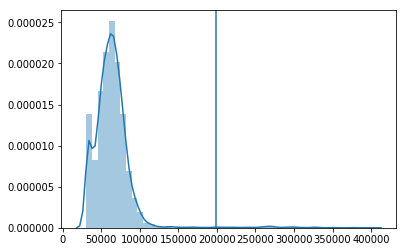

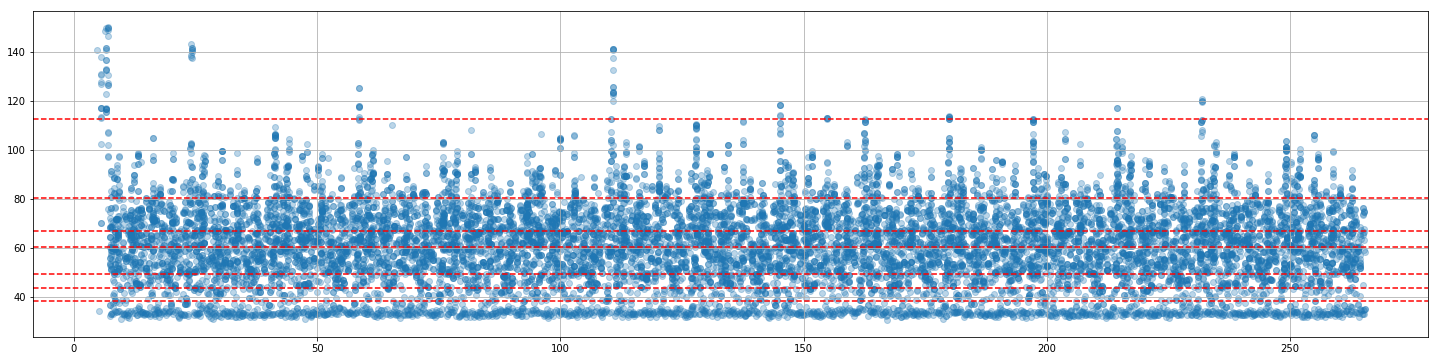

In [44]:
plt.axvline(x=(np.percentile((final_list[:, 1]), 99)))
sns.distplot(final_list[:, 1])

inception_array = np.array([
       [1,  68.10305,  26.3],
       [2,  72.8235,   45.8],
       [4,  73.88426,  81.5],
       [8,  105.866700, 132.8],
       [12, 112.031640, 179.5],
       [16, 149.952640, 199.5],
       [24, 195.421250, 213.0]])
inception_array=inception_array[np.argsort(inception_array[:,0])]
batches = inception_array[:,0]
over_latencies = 1/(inception_array[:,2]/1000)

plt.figure(figsize=(25,6))
for l in batches*over_latencies:
    plt.axhline(y=l, linestyle="--", color="red")
final_list_to_plot = final_list[final_list[:,1]/1000<150]
# final_list_to_plot = final_list
plt.scatter(final_list_to_plot[:,0]/1000000., final_list_to_plot[:,1]/1000.,alpha=0.3)
plt.grid()

In [45]:
queue_waiting_times = np.asarray([[d['driver::send'], d['clipper::task_dequeued'] - d['clipper::task_enqueued']] for d in data["throughput_results"]["lineage"]["inception"]])

In [33]:
inception_responses = np.asarray([[d['driver::send'], d['driver::recv'] - d['driver::send']] for d in data["throughput_results"]["lineage"]["inception"]])

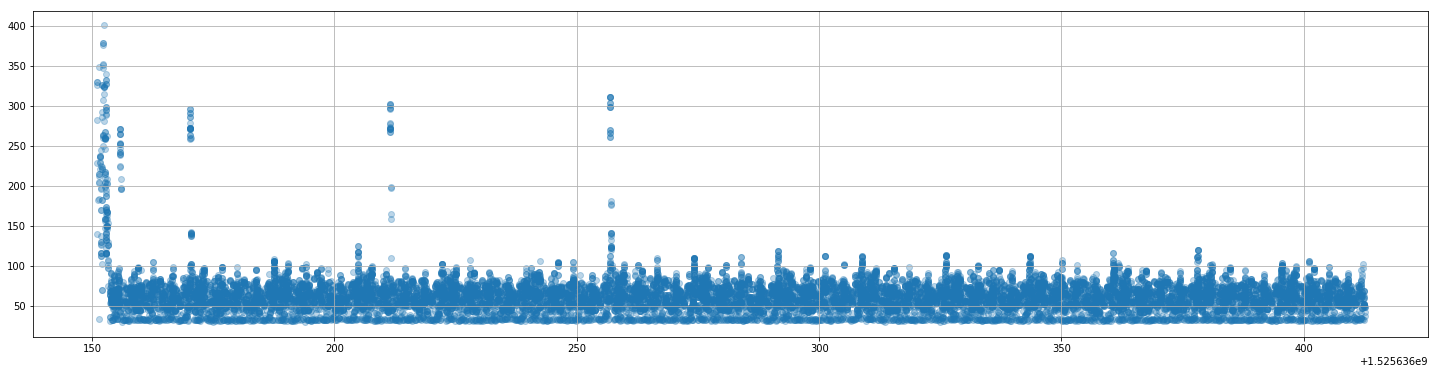

In [34]:
plt.figure(figsize=(25,6))
plt.scatter(inception_responses[:,0]/1000000., inception_responses[:,1]/1000.,alpha=0.3)
plt.grid()

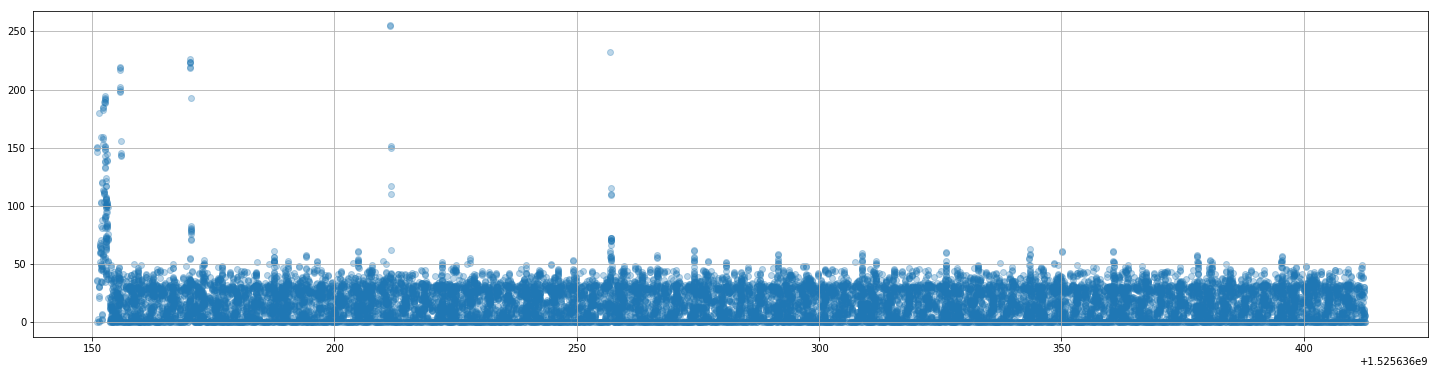

In [46]:
plt.figure(figsize=(25,6))
plt.scatter(queue_waiting_times[:,0]/1000000., queue_waiting_times[:,1]/1000.,alpha=0.3)
plt.grid()